# Δεύτερη Σειρά Ασκήσεων

### Δευτερη ασκηση

#### Κωνσταντινος Ευαγγελου ΑΜ: 4054


## Βημα 1



In [1]:
import json
import pandas as pd #The pandas library
from pandas import Series, DataFrame #Main pandas data structures
import matplotlib.pyplot as plt #main plotting tool for python
import matplotlib as mpl
import numpy as np
import seaborn as sns #A more fancy plotting library
df1 = pd.DataFrame(pd.read_csv(r'./cell_phone_ratings.csv'))

import warnings
warnings.filterwarnings('ignore') #In order to skip the ugly  warnings when we use k-means.

#print(df1)

#add a column with the review count of the users
df1["users_review_count"] = df1.groupby('reviewerID')['asin'].transform('size')
#add a column with the review count of the asins
df1["review_count"] = df1.groupby('asin')['reviewerID'].transform('size')
#df1["users_review_count"] = df1.groupby('reviewerID')['asin'].transform('nunique')
#df1["review_count"] = df1.groupby('asin')['reviewerID'].transform('nuinique')
#df1.dropna(inplace = False)
df1.sort_values(by='users_review_count', inplace=True)
print(df1)
df1.sort_values(by='review_count', inplace=True)
print(df1)

           reviewerID        asin  overall  users_review_count  review_count
47993  A1W8X41DAROPQ6  B00ONSC81E        5                   1             5
14296   AS998JA7QSTHC  B00BV1MVJ0        2                   1           206
14297  A1YMM586LNXGUZ  B00BV1MVJ0        5                   1           206
37694  A3CS7JXTMIIPLG  B00WN7L4IA        5                   1           100
37690  A3GFBHYM4AYXAJ  B00WN7L4IA        1                   1           100
...               ...         ...      ...                 ...           ...
37500   AF5F2SXVY6UZZ  B00W7S1M8M        5                  33            25
38064   AF5F2SXVY6UZZ  B00Y0NI7FS        5                  33            16
34509   AF5F2SXVY6UZZ  B00QKVEUF4        5                  33           119
47758   AF5F2SXVY6UZZ  B01GQWT4SE        5                  33            23
36672   AF5F2SXVY6UZZ  B00V4LPCQG        5                  33            78

[47994 rows x 5 columns]
           reviewerID        asin  overall  users_

In [2]:
#pruning
df2 = df1[(df1['review_count'] >4 ) ]


while (df2['review_count'] <6).any() or (df2['users_review_count'] <6).any():
    #print(df2)
    #pruning based on the review coutn of the items
    df2 = df2[(df2['review_count'] >5)]
    #calculate again the review coutn of users based on the filtered dataframe
    df2["users_review_count"]=df2.groupby('reviewerID')['asin'].transform('size')
    #df2["users_review_count"]=df2.groupby('reviewerID')['asin'].transform('nunique')
    #pruning based on the review coutn of the users
    df2 = df2[(df2['users_review_count'] > 5)]
    #calculate again the review count of items based on the pruned dataframe
    df2["review_count"]=df2.groupby('asin')['reviewerID'].transform('size')
    #df2["review_count"]=df2.groupby('asin')['reviewerID'].transform('nunique')
    #print(df2.reviewerID.nunique())
    

##### Αρχικα διαβαζοντας την εκφωνηση καταλαβα οτι θα κρατήσουμε μόνο χρήστες που έχουν βαθμολογήσει τουλάχιστον 5 διαφορετικα κινητά, και κινητά που έχουν βαθμολογηθεί από τουλάχιστον διαφορετικους 5 χρήστες.Αυτο με παρεπεμψε στο να χρησιμοποιησω το nunique.Ωστοσω με αυτο μου εβγαιναν 2748 rows.Με το size ,που δεν ξεχωριζει τα διαφορετικα, μιυ βγηκαν 2969 rows.


In [3]:
df2.sort_values(by='users_review_count', inplace=True)
print(df2)
df2.sort_values(by='review_count', inplace=True)
print(df2)

           reviewerID        asin  overall  users_review_count  review_count
20144  A2JAP5TEARILX8  B00FJBD94Y        5                   6             6
8588   A2E5ZLFPFIH8MF  B0078LXM40        5                   6            26
8523   A28K4ZATP5520J  B0078LXM40        5                   6            26
8518    A4UUWN5VTEU88  B0078LXM40        5                   6            26
8516    AEAC5OJ7FX0Z3  B0078LXM40        5                   6            26
...               ...         ...      ...                 ...           ...
9903   A1RNVKFD1PF1QF  B008QVR332        5                  21             7
19132  A1RNVKFD1PF1QF  B00F3J4HCA        5                  21             6
22355  A1RNVKFD1PF1QF  B00GXHPN1U        5                  21           136
12249  A1RNVKFD1PF1QF  B00AEK5V5K        5                  21            24
16858  A1RNVKFD1PF1QF  B00DMI9N32        5                  21             6

[2969 rows x 5 columns]
           reviewerID        asin  overall  users_r

### Δειγματιληψεια τροποποιοντας(ετσι ωστε να επιστρεφει ενα dataframe με τα columns μας)    τον αλγοριθμο reservoir sampling που φτιαξαμε στην ασκηση 1. 

In [4]:
import random

def sample(file_name,K_size):
   
    K = []
    
    header=""
    with open( file_name, 'r') as file:
        i = 0
        header
        for line in file:
            if i < K_size :
                K.append(line)
                
            if i==0:
                header=line.strip().split(',')
               
            else:
                rng = random.randint(0, i)
                if rng < K_size:
                    K[rng] = line.strip()
            i += 1
    return pd.DataFrame([x.split(',') for x in K], columns=header)
   

In [5]:
df1 = pd.DataFrame(pd.read_csv(r'./cell_phone_ratings_pruned.csv'))
#sampel 10% from our dataframe
test_set1=(sample(r"./cell_phone_ratings_pruned.csv",len(df1)/10))
print(test_set1)
#remove sampeld data from our dataframe
training_set2=df1.drop(test_set1.index)
print(training_set2)

         reviewerID        asin overall
0    A13MSOD93RH5BW  B00L4DXRS4       5
1    A3Q03O4Q8GKT8G  B0034TZONM       5
2    A28K4ZATP5520J  B00LLP508U       5
3    A242ADDCE3YB3U  B00D8T9QZU       5
4    A3IG1R5IOVHFXR  B0034TZONM       5
..              ...         ...     ...
292  A34D3OWPAF46C2  B00GXHPN1U       5
293   AUGGOB99VRU6U  B00GXHPN1U       5
294  A1NPNT3N0BB6S9  B00FJ92RYO       4
295  A1D7P4FDK8BOS0  B00INEIZN4       5
296  A1JTYY6WIPVUXI  B00E3913G4       5

[297 rows x 3 columns]
          reviewerID        asin  overall
297   A1UPM23FHOVFQ1  B004DPZ2T2        5
298   A2UWJYIMCKDDP2  B004DPZ2T2        5
299   A1MII57V54764P  B004DPZ2T2        5
300   A2TNGCUS3K32MS  B004DPZ2T2        5
301    AYDLETEYQFTDE  B004DPZ2T2        3
...              ...         ...      ...
2964  A2R6U7WLNVSIJL  B01F57V826        5
2965  A3UHUP814K2GVU  B01F57V826        5
2966  A2RJB9YB8059OJ  B01F57V826        4
2967  A214JQI91IH3S1  B01F57V826        5
2968  A1QPLMB8S5KZDD  B01F57V826  


##### Προφανως και δεν ειναι μια καλη χρηση του αλγοριθμου, αφου θελουμε το 10% του αγνωστου Ν. Οποτε φορτωνουμε ηδη ολο το αρχειο για να παρουμε το len(df1)/10)
##### Αν το ζητουμενο ηταν ενα συγκεκριμενο δειγμα ανεξαρτητο του Ν θα μπορουσαμε να χρησιμοποιησουμε τον αλγοριθμο μας σωστα.

### Δειγματιοληψια χρησιμοποιοντας την ετοιμη συναρτηση sample.


In [6]:
#sample 10% of our dataframe
test_set=df1.sample(frac=0.1, replace=True, random_state=1)
print(test_set)
#remove the sampled data from our dataframe
training_set=df1.drop(test_set.index)
print(training_set)


          reviewerID        asin  overall
1061  A274WNJFBIYQNE  B00C1DIGRI        1
235   A16OQXVU832Q66  B00466R0V6        5
1096  A1Z0NQAZWJ3YKP  B00CBSX5U6        5
905   A3NCI84F8FVSUT  B00B3HX5Y2        5
2763  A2U44VA0G6MNOI  B00MWI4IN8        5
...              ...         ...      ...
1845  A12V7BFRODAIC1  B00G3C2FTS        5
505    AUGGOB99VRU6U  B0078LXM40        5
626    AJSDV5OVPZ7Y3  B008DYS016        5
1774   ABP0DA3ZE2D4B  B00FX8WIUE        5
1949   AGUB36NO7BSDR  B00GXHPN1U        5

[297 rows x 3 columns]
          reviewerID        asin  overall
0      ASK11J3ZXE42J  B0016JDBYG        2
1     A39Y702EFQOVNG  B0016JDBYG        5
2      AHIY1S8OE0JAE  B0016JDBYG        3
3      ASK11J3ZXE42J  B0016JDBYG        2
4     A39Y702EFQOVNG  B0016JDBYG        5
...              ...         ...      ...
2964  A2R6U7WLNVSIJL  B01F57V826        5
2965  A3UHUP814K2GVU  B01F57V826        5
2966  A2RJB9YB8059OJ  B01F57V826        4
2967  A214JQI91IH3S1  B01F57V826        5
2968  A1QP

## Βημα 2
### User Agerage (UA) και  Item Average (IA)

In [7]:
from sklearn.metrics import mean_squared_error
training_data = pd.DataFrame(pd.read_csv(r'./ratings_train.csv'))
test_data=pd.DataFrame(pd.read_csv(r'./ratings_test.csv'))
#find the mean
training_data["user_average"]=training_data.groupby('reviewerID')["overall"].transform("mean")
#print(training_data)
#merge to add the user_average to the test data and drop duplicates since training data had duplicate rows
test_data = pd.merge(test_data, training_data[['reviewerID', 'user_average']], on='reviewerID', how='left').drop_duplicates()

#print(test_data)
print()
print(" UA RMSE :",np.sqrt(mean_squared_error(test_data['overall'], test_data['user_average'])))


#same proccess for the item average

# find the mean
training_data["item_average"]=training_data.groupby('asin')["overall"].transform("mean")
#merge to add the item_average to the test data and drop duplicates since since training data had duplicate rows
test_data = pd.merge(test_data, training_data[['asin', 'item_average']], on='asin', how='left').drop_duplicates()
#print(test_data)

print(" IA RMSE :",np.sqrt(mean_squared_error(test_data.overall, test_data.item_average   )))



 UA RMSE : 0.5397865558697561
 IA RMSE : 0.5138120657943773


## Βημα 3

### Singular Value Decomposition

 SVG BEST RMSE for k = 20 : [19] 2.1967891860670052
 SVG BEST RMSE for k = 60 : [19] 2.1967891860670052
 SVG BEST RMSE for k = 120 : [105] 2.1616324286278146


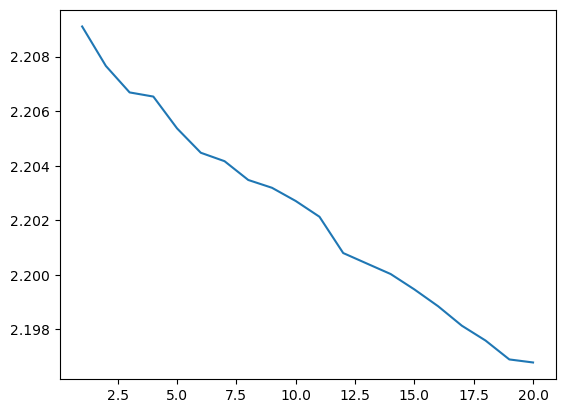

<Figure size 640x480 with 0 Axes>

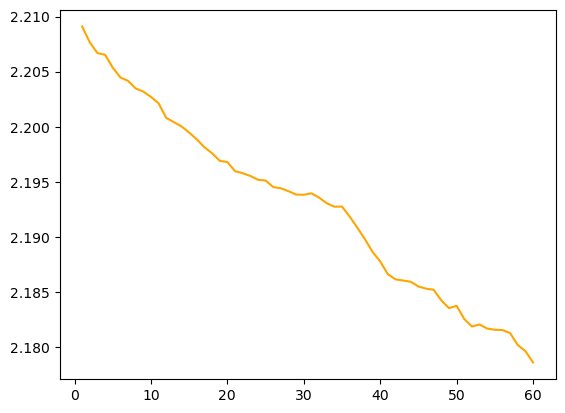

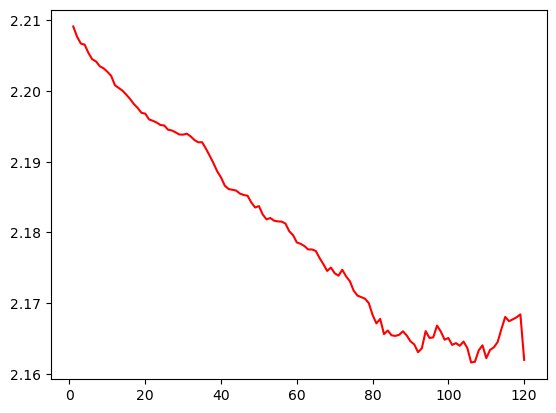

In [8]:
import scipy.sparse as sp_sparse
training_data = pd.DataFrame(pd.read_csv(r'./ratings_train.csv'))
test_data=pd.DataFrame(pd.read_csv(r'./ratings_test.csv'))

#matching our data with numbers.
training_data['reviewerIDn'] = pd.factorize(training_data['reviewerID'])[0]
training_data['asinn'] = pd.factorize(training_data['asin'])[0]
                                           
#print(training_data)
R = sp_sparse.csr_matrix((training_data["overall"],(training_data["reviewerIDn"],training_data["asinn"])), shape=(((training_data['reviewerID'].nunique()),((training_data['asin'].nunique())))))
#trainign_data= training_data.drop_duplicates(subset=["reviewerID","asin"])
#reviewerID = trainign_data["reviewerID"].unique()
#reviewerID = {reviewerID[i]:i for i in range(len(reviewerID))}
#asin = trainign_data["asin"].unique()
#asin = {asin[i]:i for i in range(len(asin))}
#print(uniqueUsers)
#print(asin)
u,s,v = sp_sparse.linalg.svds(R.astype(float), k=120)
#print(R.shape)
errors = []
test_data['reviewerID'] = pd.factorize(test_data['reviewerID'])[0]
test_data['asin'] = pd.factorize(test_data['asin'])[0]
for k in range(1,121):
    #recomposition of the matrix for our test data  for different values of k
    test_data["svg_estimation"] = test_data.apply(lambda x: u[int(x.reviewerID),:][:k]@np.diag(s[:k])@v[:,int(x.asin)].T[:k] , axis=1)
    #clipping estimation in case its out of bounds.
    test_data["svg_estimation"] = test_data["svg_estimation"].apply(lambda x: 5 if x > 5 else x)
    test_data["svg_estimation"] = test_data["svg_estimation"].apply(lambda x: 0 if x < 0 else x)
    RMSE = np.sqrt(mean_squared_error(test_data["overall"], test_data["svg_estimation"], squared=False))
    errors.append(RMSE)
   
plt.plot([k for k in range(1,21)], errors[:20])
plt.figure()
print(" SVG BEST RMSE for k =", 20, ":",[np.argmin(errors[:20])], str(min(errors[:20])))
plt.figure()
plt.plot([k for k in range(1,61)], errors[:60],color="orange")
plt.figure()
print(" SVG BEST RMSE for k =", 60, ":",[np.argmin(errors[:20])], str(min(errors[:20])))


plt.plot([k for k in range(1,121)], errors,color="red")

print(" SVG BEST RMSE for k =", 120, ":",[np.argmin(errors)], str(min(errors)))

#### Οπως ειναι λογικο, το μικροτερο RMSE επιτυγχανεται στο μεγαλυτερο k.(Περισσοτερη πληροφορια συνεπαγεται και περισσοτερη ακριβεια.)
#### Ωστοσω η βελτιωση δεν ειναι ικανοποιητικη καθως ειναι ιδιαιτερα μικρη .

## ΒΗΜΑ 4 
### User Based Collaborative Filtering (UCF)

Best K= 1  with RMSE= 1.5869840952317444


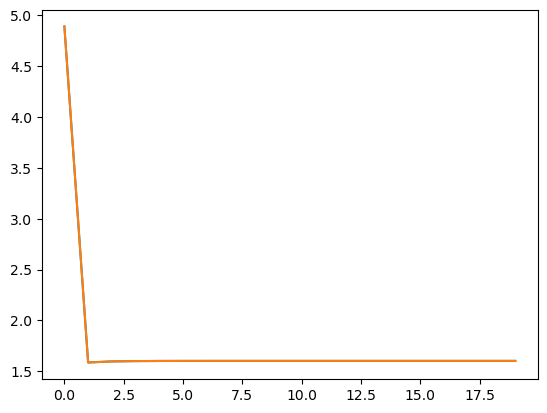

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import math

#print(R.shape)
#create cos_sim_matrix
cos_sim_matrix=cosine_similarity(R)
#print(cos_sim_matrix.shape)
def UCF( reviewerID,asin,k):
    #1) find the users that rated the item
    users_that_rated = R[:, asin].nonzero()[0]
    #2) calculate the similariy
    similarity_users=cos_sim_matrix[reviewerID,users_that_rated]
    #print(similarity_users)
    similarity_users=np.sort(similarity_users)[::-1]
    #print(R[:, asin].toarray().flatten()[top_k_users.astype(int)])
    i=0
    ratings = []
    rating = 0
    while i<k:
        #print(similarity_users)
        #if there are more  than i similar users, use i users, else use them all.
        if len(similarity_users) > i:
            top_k_users = similarity_users[:i]
        #             sum of cosine similarity * sum of R[u',c]
        numerator = np.sum(similarity_users[top_k_users.astype(int)] * R[users_that_rated[top_k_users.astype(int)], asin])
        #             sum of cosine similarity
        denominator = np.sum(similarity_users[top_k_users.astype(int)])
        
        
        if(denominator!=0):
            rating= numerator/denominator
        #clipping estimation in case its out of bounds.   
        rating = 5 if rating > 5 else rating
        rating = 0 if rating < 0 else rating     
        ratings.append(rating)
       # print(ratings,"sadasd")
        i=i+1
    return ratings  
   
k = test_data.apply(lambda x : UCF(int(x.reviewerID), int(x.asin),20), axis=1)

K = range(20)
RMSE = []
#print( test_data.k[0])

for i in range(20):
    
    mse = mean_squared_error(test_data["overall"],[x[i] for x in k])
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
null = plt.plot(K, RMSE)
print("Best K=", K[np.argmin(RMSE)], " with RMSE=", str(min(RMSE)))
    
null = plt.plot(K, RMSE)

## ΒΗΜΑ 5
### Item Based Collaborative Filtering (ICF)

Best K= 2  with RMSE= 1.5075567228888183


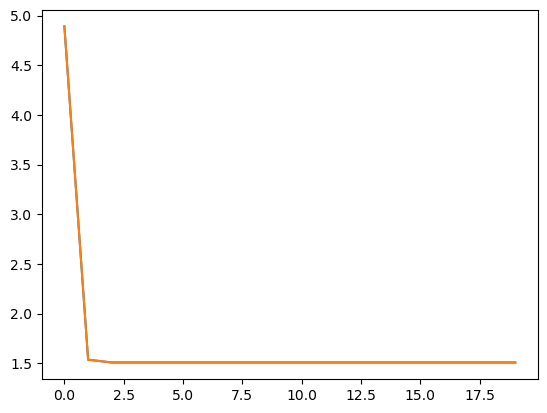

In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import math

#print(R.shape)
#create cos_sim_matrix
cos_sim_matrix=cosine_similarity(R)
#print(R)
def ICF( reviewerID,asin,k):
    #1) find the items that got rated by the user
    items_that_rated = R[reviewerID, :].nonzero()[1]
    #2) calculate the similariy
    similarity_items=cos_sim_matrix[asin,items_that_rated]
    #print(similarity_users)
    similarity_items=np.sort(similarity_items)[::-1]
    #print(R[:, asin].toarray().flatten()[top_k_users.astype(int)])
    i=0
    ratings = []
    rating = 0
    while i<k:
        #print(similarity_users)
        #if there are more  than i similar items, use i items, else use them all.
        if len(similarity_items) > i:
            top_k_items = similarity_items[:i]
        #             sum of cosine similarity * sum of R[u,c']
        numerator = np.sum(R[reviewerID, items_that_rated[top_k_items.astype(int)]]*similarity_items[top_k_items.astype(int)] )
        #             sum of cosine similarity
        denominator = np.sum(similarity_items[top_k_items.astype(int)])
        
        
        if(denominator!=0):
            rating= numerator/denominator
        #clipping estimation in case its out of bounds.   
        rating = 5 if rating > 5 else rating
        rating = 0 if rating < 0 else rating    
        ratings.append(rating)
       # print(ratings,"sadasd")
        i=i+1
    return ratings  
   
k = test_data.apply(lambda x : ICF(int(x.reviewerID), int(x.asin),20), axis=1)

K = range(20)
RMSE = []
#print( test_data.k[0])

for i in range(20):
    
    mse = mean_squared_error(test_data["overall"],[x[i] for x in k])
    rmse = np.sqrt(mse)
    RMSE.append(rmse)
    
null = plt.plot(K, RMSE)
print("Best K=", K[np.argmin(RMSE)], " with RMSE=", str(min(RMSE)))
    
null = plt.plot(K, RMSE)

#### Βλεπουμε πως ο Item Based Collaborative Filtering ειναι λιγο καλυτερος απο τον User Based Collaborative Filtering.
#### Λογικο αποτελεσμα , αφου οι χρηστες σαν μετρο συγκρισης ειναι πολυ πιο απροβλεπτοι απο τα αντικειμενα.
#### Επισης βλεπουμε και στους δυο αλγοριθμους το χαρακτηριστικος σχημα "γονατο" η "αγκονα" , με το καλυτερο  RMSE να επιτυγχανεται σε μικρο αριθμο όμοιων χρηστών, όμοιων αντικειμενων.

## ΒΗΜΑ 6
### Cluster Average(CA)

<Figure size 640x480 with 0 Axes>

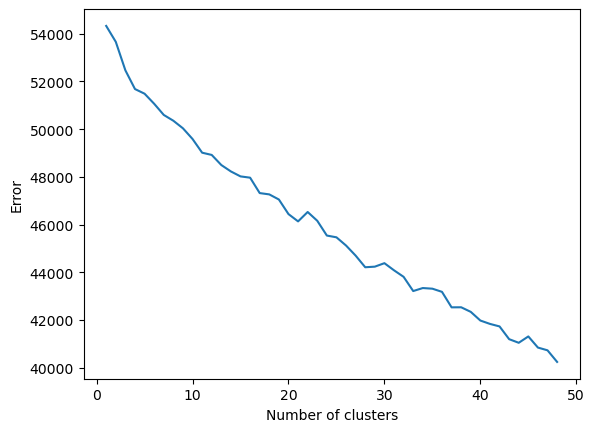

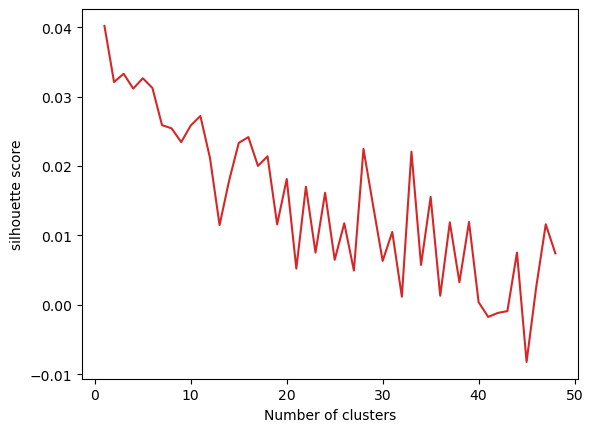

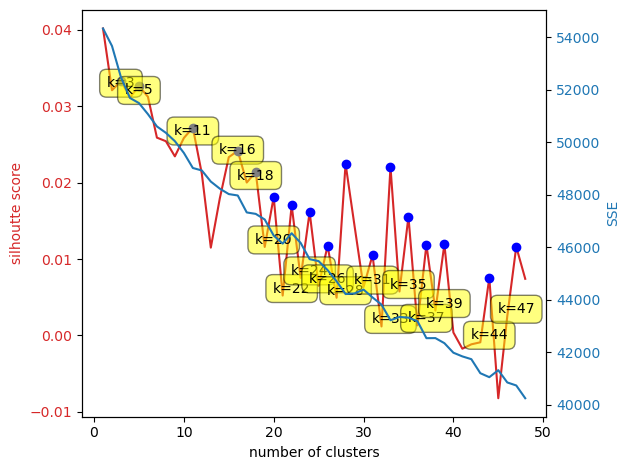

<Figure size 640x480 with 0 Axes>

In [11]:
import sklearn.cluster as sk_cluster
import sklearn.metrics as metrics
from scipy.sparse import find
from scipy.signal import find_peaks
error = np.zeros(49)
sh_score = np.zeros(49)
for k in range(2,51):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k)
    kmeans.fit_predict(R)
    error[k-2] = kmeans.inertia_
    if k>1: sh_score[k-2]= metrics.silhouette_score(R, kmeans.labels_)
    #print(kmeans.labels_)

plt.plot(range(1,len(error)),error[1:])
plt.xlabel('Number of clusters')
plt.ylabel('Error')
plt.figure()
color = 'tab:red'
plt.plot(range(1,len(sh_score)),sh_score[1:], color=color)
plt.xlabel('Number of clusters')
plt.ylabel('silhouette score')

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhoutte score', color=color)
ax1.plot(range(1,len(sh_score)),sh_score[1:], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('SSE', color=color)  # we already handled the x-label with ax1
ax2.plot(range(1,len(error)),error[1:], color=color)
ax2.tick_params(axis='y', labelcolor=color)
peaks, _ = find_peaks(sh_score[1:],distance=1)

# Highlight local maximum on the graph
ax1.plot(peaks + 1, sh_score[peaks + 1], 'bo', label='Local Maximum')
for k in peaks + 1:
    ax1.annotate(f'k={k}', xy=(k, sh_score[k-1]), ha='center',  color='black',va = 'bottom', fontsize=10, bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5))
fig.tight_layout() 


plt.figure()


    
    
    

##### Στο συνδιαστικο διαγραμμα  silhoutte score και SSE, οι καλυτερες τιμες του k, ειναι αυτες που μεγιστοποιουν το silhoutte score ενω ταυτοχρονα ελαχιστοποιουν το SSE. Τα τοπικα μεγιστα του silhoutte score ειναι ενδιαφερουσες τιμες για να μελετησουμε.
##### H τιμη 47(η τελευταια κορυφη ) φαινεται η σωστοτερη,καθως τηρει τις προαναφερθησες προυποθεσεις.


(389,)
(389, 177)
Best K= 34  with RMSE= 0.6384592282929761
Best K= 34  with RMSE= 0.6384592282929761
Best K= 34  with RMSE= 0.6384592282929761


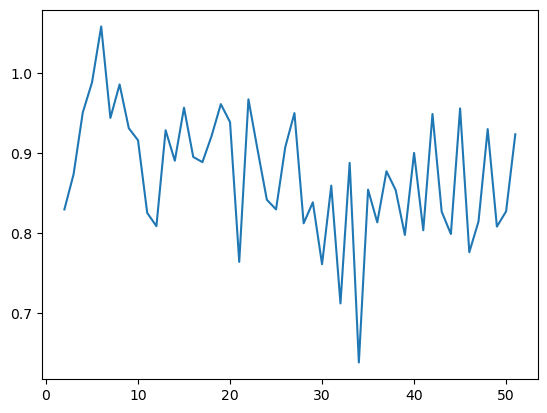

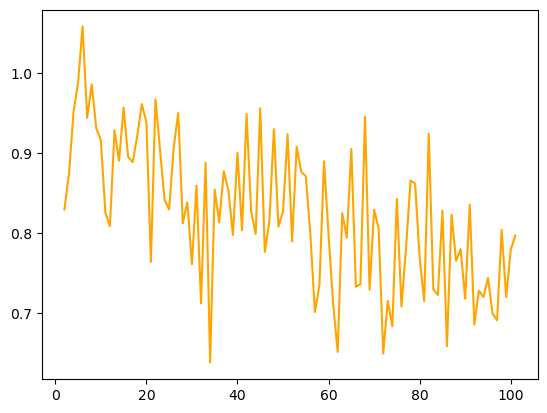

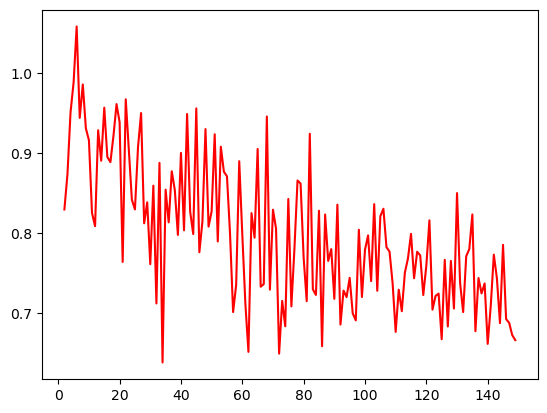

In [12]:
k =3 # You can set the desired number of clusters



kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=k)
cluster_labels = kmeans.fit_predict(R)
print(cluster_labels.shape)
print(R.shape)
users_in_cluster = np.where(cluster_labels == 2)[0]
users_rating_in_cluster = R[users_in_cluster, :]

# colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
# colors = np.hstack([colors] * 20)
# plt.scatter(R[:, 0], R[:, 1], c=cluster_labels, s=10, alpha=0.8)

# Calculate the mean rating for each item in the cluster
mean_ratings_per_item = np.mean(users_rating_in_cluster, axis=0)

#print("Mean ratings per item in cluster", 2)
#print(mean_ratings_per_item)
#print(cluster_labels)
def kmeans_prediction(reviewerID,asin,cluster_labels):
    #find users that are in the same cluster with or user.
    users_in_cluster = np.where(cluster_labels == cluster_labels[reviewerID])[0]
    #find the users ratings
    users_rating_in_cluster = R[users_in_cluster, asin]
    
   
    #print(users_rating_in_cluster)
    #Calculate the mean rating for each item in the cluster
    mean_rating_for_item = np.mean(users_rating_in_cluster[users_rating_in_cluster != 0])
    #print(mean_ratings_per_item)
    #print(R[users_in_cluster, asin])
    if mean_rating_for_item != 0 :
        return   mean_rating_for_item
    #in case the mean is zero, return the mean rating of the users in cluster for all asins
    else:
        users_ratings_for_all=R[users_in_cluster,:]
        mean_rating_for_item = np.mean(users_ratings_for_all[users_ratings_for_all != 0])
        return mean_rating_for_item
    
#kmeans_prediction(113,1,cluster_labels)
#test_data["k-means"] = test_data.apply(lambda x : kmeans_prediction(int(x.reviewerID), int(x.asin),cluster_labels), axis=1)
#test_data.sort_values(by='overall', inplace=True)
#print(" CA RMSE :",np.sqrt(mean_squared_error(test_data['overall'], test_data['k-means'])))
#k = test_data.apply(lambda x : kmeans_prediction(int(x.reviewerID), int(x.asin),cluster_labels), axis=1)

K=range(2,150)
RMSE = []
for i in range(2,150):
    kmeans = sk_cluster.KMeans(init='k-means++', n_clusters=i)
    cluster_labels = kmeans.fit_predict(R)
    test_data["k-means"] = test_data.apply(lambda x : kmeans_prediction(int(x.reviewerID), int(x.asin),cluster_labels), axis=1)
    rmse =np.sqrt(mean_squared_error(test_data['overall'], test_data['k-means']))
    RMSE.append(rmse)

K_50=K[:50]

print("Best K=", K_50[np.argmin(RMSE[:50])], " with RMSE=", str(min(RMSE[:50])))
null = plt.plot(K[:50], RMSE[:50])

#For k= 100
K_100=K[:100]
plt.figure()
print("Best K=", K_100[np.argmin(RMSE[:100])], " with RMSE=", str(min(RMSE[:100])))
null = plt.plot(K[:100], RMSE[:100],color='orange')


plt.figure()
#For k= 150
K_150=K[:150]
print("Best K=", K_150[np.argmin(RMSE)], " with RMSE=", str(min(RMSE)))
null = plt.plot(K, RMSE,color='red')


##### O αλγοριθμος Cluster Average φαινεται να κανει καλη δουλεια επιτυγχανοντας ενα σχετικα χαμηλο RMSE. 
##### Μελετωντας τον για 100 και 150 clusters, βλεπουμε ελαχιστη βελτιωση στο RMSE ,κατι που κανει ασυμφωρη την υλοποιηση με τετοιον αριθμο clusters.

## ΒΗΜΑ 7

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">Algorithm</th>
    <th class="tg-0pky">Best RMSE</th>
    <th class="tg-0pky"></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">User Average</td>
    <td class="tg-0pky"> 0.5397865558697561</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Item Average</td>
    <td class="tg-0pky">0.5138120657943773</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Singular Value Decomposition</td>
    <td class="tg-0pky">2.1553754528737037</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">User Based Collaborative Filtering</td>
    <td class="tg-0pky">1.5869840952317444</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Item Based Collaborative Filtering</td>
    <td class="tg-0pky">1.5075567228888183</td>
    <td class="tg-0pky"></td>
  </tr>
  <tr>
    <td class="tg-0pky">Cluster Average</td>
    <td class="tg-0pky">0.6384592282929761</td>
    <td class="tg-0pky"></td>
  </tr>
</tbody>
</table>


##### Παρατηρουμε οτι  οι πιο γρηγοροι αλγοριθμοι ειναι οι User Average και Item Average, αν και οι πιο απλοι.
##### Αμεσως μετα εχουμε τον Cluster Average, αν και ερχεται με ιδιαιτερα μεγαλυτερη πολυπλοκοτητα.
##### Οι User Based Collaborative Filtering και Item Based Collaborative Filtering ειναι πιο αργοι και πιο πολυπλοκοι επισης απο τους  User Average και Item Average ,νεω παραλληλα δεν ξεχωριζει το RMSE  τους.
##### Ο Singular Value Decomposition αποδυκνειεται ο χειροτερος απο ολους για τα δεδομενα μας με το χειροτερο RMSE
